# Tasks on Series

In [1]:
import pandas as pd

### `Q-1:` Write a program to create an empty series.

In [2]:
empt_series = pd.Series()
empt_series

Series([], dtype: object)

### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [16]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([6, 7, 8, 9, 10])

def arith_operations(series1, series2, operation):
    if operation == 1:
        return series1 + series2
    elif operation == 2:
        return series1 - series2
    elif operation == 3:
        return series1 * series2
    elif operation == 4:
        return series1 / series2
    elif operation == 0:
        return
    else:
        return f"incorrect operation {operation} does not exist"
    
usr_input = int(input("Enter 1 for addition, 2 for subtraction, 3 for multiplication, 4 for division, and 0 to quit"))
arith_operations(ser1, ser2, usr_input)

0     6
1    14
2    24
3    36
4    50
dtype: int64

### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]

In [3]:
series_a = pd.Series([2, 4, 6, 8, 10])
series_b = pd.Series([1, 3, 5, 7, 10])

# program will return 'True' for whatever conditions meet, and 'False' for the ones that doesn't meet
print(series_a == series_b)
print(series_a < series_b)
print(series_a > series_b)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


### `Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [31]:
series = pd.Series([1, 2, 'Python', 2.0, True, 100])

def type_changer(series, input_dtype):
    if input_dtype == 1:
        return pd.to_numeric(series, errors='coerce', downcast='integer').astype('Int64') # because coercing and the presence of NaN made it float64
    elif input_dtype == 2:
        return pd.to_numeric(series, errors='coerce') # by default float64
    elif 3:
        return series.astype(dtype=str)
    else:
        return "invalid input"
    
input_dtype = int(input("Enter 1 to convert series to integer, 2 for float, and 3 for string"))
type_changer(series, input_dtype)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

### `Q-6` Find top 10 most run getter from the series.

In [46]:
runs = pd.read_csv('batsman_runs_series.csv', index_col='batter')
runs.copy().sort_values(by='batsman_run', ascending=False).head(10)


,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


In [27]:
batsman_runs = pd.read_csv('batsman_runs_series.csv', index_col='batter')
batsman_runs = batsman_runs.squeeze()
sorted_runs = batsman_runs.copy().sort_values(ascending=False)
sorted_runs.head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

### `Q-7` No of players having runs above 3000

In [62]:
runs[batsman_run > 3000].count()

batsman_run    20
dtype: int64

In [ ]:
batsman_runs[batsman_runs > 3000].count()

### `Q-8` No of players having runs above mean value?

In [60]:
runs[runs['batsman_run'] > runs['batsman_run'].mean()].count()

batsman_run    128
dtype: int64

In [63]:
runs[batsman_run > batsman_run.mean()].count()

batsman_run    128
dtype: int64

In [37]:
batsman_runs[batsman_runs > batsman_runs.mean()].count()

np.int64(128)

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



### `Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    iii. Item price is given in $, so convert it to rupees without currency symbol.
    iv. Make data type of newly made series as float.
    v. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [64]:
# i.
items = pd.read_csv('items.csv', index_col='item_name')
items = items.squeeze()
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [65]:
# ii.
items.isna().sum()

np.int64(50)

In the above code, `.sum()` gives the accurate number because it treats `True` as **1** and `False` as **0**, and therefore the sum resulting in the total number of **True Values**, i.e. values that are NaN.

`items.isna().count()` cannot be expected to work because it will simply result the total number of rows being returned by `isna()`, i.e. counting the number of all the rows in the original dataset.

In [66]:
# iii.
items_rupees = pd.to_numeric(items.str[1:], errors='coerce') * 85
items_rupees
items_rupees

item_name
Chips and Fresh Tomato Salsa              203.15
Izze                                      288.15
Nantucket Nectar                          288.15
Chips and Tomatillo-Green Chili Salsa     203.15
Chicken Bowl                             1443.30
                                          ...   
Steak Burrito                             998.75
Steak Burrito                             998.75
Chicken Salad Bowl                        956.25
Chicken Salad Bowl                        743.75
Chicken Salad Bowl                        743.75
Name: item_price, Length: 4622, dtype: float64

In [75]:
# iv.
import random
items_rupees = pd.to_numeric(items_rupees, errors='coerce') # default is float itself
type(items_rupees.iloc[random.randint(1, 50)])

numpy.float64

In [24]:
# v.
items_rupees.fillna(items_rupees.mean(), inplace=True)
items_rupees.isna().sum()

np.int64(0)

### `Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [37]:
# i.
mean_price = items_rupees.mean()
print(mean_price)

634.3576771653543


In [31]:
# ii.
print(f"30th percentile: {items_rupees.quantile(q=0.3)}")
print(f"6th percentile: {items_rupees.quantile(q=0.06)}")

30th percentile: 378.25
6th percentile: 106.25


<Axes: ylabel='Frequency'>

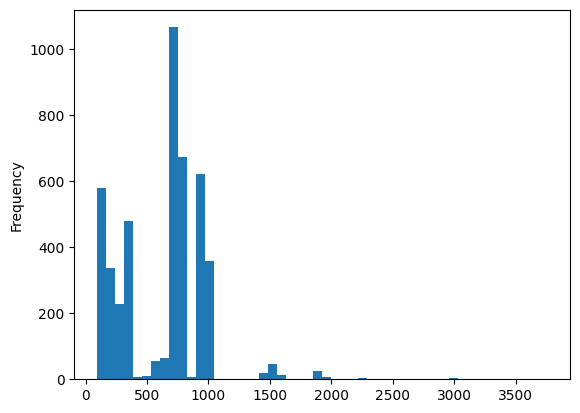

In [33]:
# iii. 
items_rupees.plot(kind='hist', bins=50)

In [35]:
# iv. 
items_rupees[(items_rupees > 1000) & (items_rupees < 2000)]

item_name
Chicken Bowl           1443.3
Chicken Salad Bowl     1912.5
Steak Burrito          1528.3
Chicken Burrito        1487.5
Chicken Bowl           1487.5
                        ...  
Chicken Bowl           1912.5
Steak Bowl             1997.5
Chicken Bowl           1487.5
Chips and Guacamole    1513.0
Chicken Salad Bowl     1487.5
Name: item_price, Length: 142, dtype: float64